In [12]:
# 커널 리셋 대용
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import os
from data import CustomDataset
from models import trainer, CustomModel


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from trains.data import get_data
torch.random.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data = pd.read_csv("./Dataset.csv")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

x_train, x_valid, y_train, y_valid = get_data(data)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

float64
(22396, 6)
(5599, 6)
(22396,)
(5599,)


In [14]:
train_dataset = CustomDataset(x_train, y_train)
train_data_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


valid_dataset = CustomDataset(x_valid, y_valid)
valid_data_loader = DataLoader(valid_dataset, batch_size=64, shuffle=True)

In [15]:
datalodder_dcit = {"train" : train_data_loader, "valid" : valid_data_loader}

In [16]:
model = CustomModel()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
criterion = nn.BCELoss()
model.to(device)
criterion.to(device)

x_histry, y_history =trainer(model, 10, datalodder_dcit, optimizer, criterion, 10, device)

100%|██████████| 88/88 [00:00<00:00, 1895.59it/s]


52.75199320636926 54.24154063653996
Epoch: 01 | Epoch Time: 0m 0s
	Train Loss: 54.242
	 Valid. Loss: 52.752


100%|██████████| 88/88 [00:00<00:00, 1871.89it/s]


48.376783709032885 53.108933088966005
Epoch: 02 | Epoch Time: 0m 0s
	Train Loss: 53.109
	 Valid. Loss: 48.377


100%|██████████| 88/88 [00:00<00:00, 2017.97it/s]


2.931057712096497 21.165881135949448
Epoch: 03 | Epoch Time: 0m 0s
	Train Loss: 21.166
	 Valid. Loss: 2.931


100%|██████████| 88/88 [00:00<00:00, 1990.36it/s]


0.83191758785942 1.4784791117226925
Epoch: 04 | Epoch Time: 0m 0s
	Train Loss: 1.478
	 Valid. Loss: 0.832


100%|██████████| 88/88 [00:00<00:00, 1999.90it/s]


0.5202468750369605 0.6823066050030618
Epoch: 05 | Epoch Time: 0m 0s
	Train Loss: 0.682
	 Valid. Loss: 0.520


100%|██████████| 88/88 [00:00<00:00, 2174.37it/s]


0.4205856476323682 0.5078761293142453
Epoch: 06 | Epoch Time: 0m 0s
	Train Loss: 0.508
	 Valid. Loss: 0.421


100%|██████████| 88/88 [00:00<00:00, 1609.11it/s]


0.3420037391883525 0.41046642961227503
Epoch: 07 | Epoch Time: 0m 0s
	Train Loss: 0.410
	 Valid. Loss: 0.342


100%|██████████| 88/88 [00:00<00:00, 2108.23it/s]


0.28806437025743803 0.34140561628840904
Epoch: 08 | Epoch Time: 0m 0s
	Train Loss: 0.341
	 Valid. Loss: 0.288


100%|██████████| 88/88 [00:00<00:00, 1728.75it/s]


0.23981486524625167 0.2822804140158853
Epoch: 09 | Epoch Time: 0m 0s
	Train Loss: 0.282
	 Valid. Loss: 0.240


100%|██████████| 88/88 [00:00<00:00, 1872.65it/s]

0.20209593738984097 0.2306608903282455
Epoch: 10 | Epoch Time: 0m 0s
	Train Loss: 0.231
	 Valid. Loss: 0.202


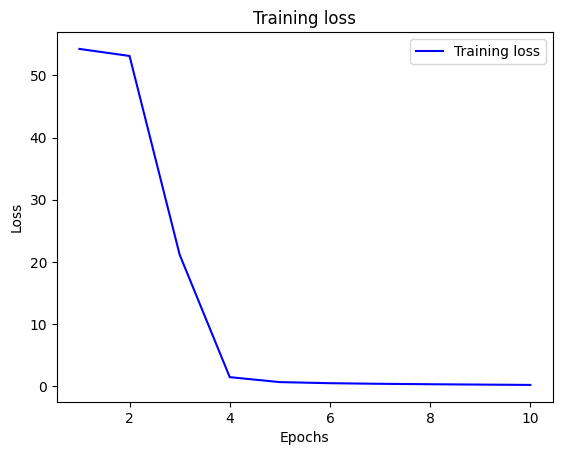

In [17]:
epochs = range(1, len(x_histry) + 1)

# Plot the loss values
plt.plot(epochs, x_histry, 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
epoch_loss = 0
epoch_acc = 0
model.eval()
loss_history = []

model = CustomModel()

model.load_state_dict(torch.load('save.pt'))
model.eval()  # 모델을 평가 모드로 설정합니다.


with torch.no_grad():
    for i, (d, v) in enumerate(valid_data_loader):
        data = d
        v = v
        output_data = model(data)
        result = F.sigmoid(output_data)
        rounded_preds = torch.round(result)
        correct = (rounded_preds.flatten() == v)
        accuracy = correct.sum() / len(correct)
        print(f"{i}정확도 : {accuracy*100}%")
        loss = criterion(result.reshape(-1, 1).to(torch.float32), v.reshape(-1, 1).to(torch.float32))
        loss_history.append(loss.item())
        epoch_loss += loss.item()

0정확도 : 96.875%
1정확도 : 96.875%
2정확도 : 98.4375%
3정확도 : 96.875%
4정확도 : 100.0%
5정확도 : 98.4375%
6정확도 : 98.4375%
7정확도 : 93.75%
8정확도 : 100.0%
9정확도 : 96.875%
10정확도 : 100.0%
11정확도 : 95.3125%
12정확도 : 98.4375%
13정확도 : 96.875%
14정확도 : 93.75%
15정확도 : 96.875%
16정확도 : 98.4375%
17정확도 : 96.875%
18정확도 : 98.4375%
19정확도 : 100.0%
20정확도 : 96.875%
21정확도 : 100.0%
22정확도 : 98.4375%
23정확도 : 96.875%
24정확도 : 96.875%
25정확도 : 98.4375%
26정확도 : 96.875%
27정확도 : 98.4375%
28정확도 : 100.0%
29정확도 : 96.875%
30정확도 : 98.4375%
31정확도 : 95.3125%
32정확도 : 96.875%
33정확도 : 95.3125%
34정확도 : 98.4375%
35정확도 : 92.1875%
36정확도 : 98.4375%
37정확도 : 100.0%
38정확도 : 95.3125%
39정확도 : 100.0%
40정확도 : 93.75%
41정확도 : 95.3125%
42정확도 : 93.75%
43정확도 : 96.875%
44정확도 : 98.4375%
45정확도 : 96.875%
46정확도 : 96.875%
47정확도 : 96.875%
48정확도 : 96.875%
49정확도 : 100.0%
50정확도 : 98.4375%
51정확도 : 96.875%
52정확도 : 95.3125%
53정확도 : 95.3125%
54정확도 : 98.4375%
55정확도 : 98.4375%
56정확도 : 95.3125%
57정확도 : 100.0%
58정확도 : 100.0%
59정확도 : 96.875%
60정확도 : 98.4375%
61정확도 : 98.4375%
62정확도 